# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Drug Testing Observations:
# Capomulin was the most frequently tested drug, followed by Ramicane, while Propriva was the least observed in the study.

# The number of male and female mice used in the testing was nearly equal.

# A positive correlation was observed between the average tumor volume and the weight of the mice. As the mice's weight increased, the tumor volume also increased.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# create dataframe for mouse_metadata
mouse_df = pd.DataFrame(mouse_metadata)
mouse_df

# create dataframe for study_results
study_df=pd.DataFrame(study_results)
study_df

# Combine the data into a single DataFrame
merge_df = pd.merge(study_df, mouse_df, on="Mouse ID")


# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_id = merge_df[merge_df.duplicated(subset=[ "Mouse ID", "Timepoint"], keep=False)]
duplicate_id["Mouse ID"].unique()







array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouseid_data = merge_df.loc[merge_df["Mouse ID"] == 'g989']
duplicate_mouseid_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]
filter_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
filter_df["Mouse ID"].nunique()

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = filter_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

median = filter_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = filter_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = filter_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = filter_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume": median,
                            "Tumor Volume Variance": var,
                            "Tumor Volume Std. Dev.":std,
                            "Tumor Volume Std. Err.":sem})
summary_stats




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = filter_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
summary_stats_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

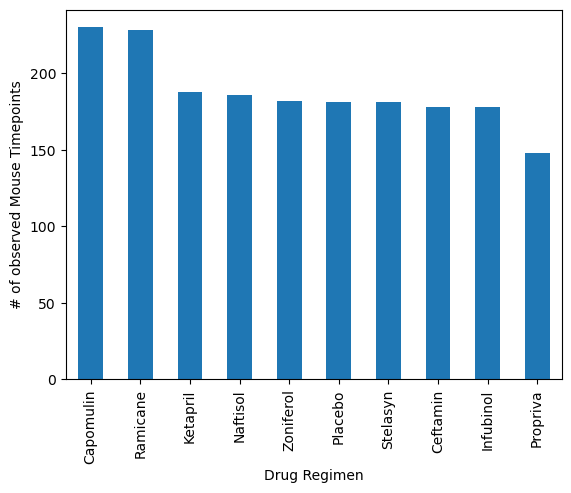

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# group by drug regimen and count the total "Timepoint" for each drug regimen
mouse_drug = filter_df.groupby("Drug Regimen")["Timepoint"].count() 

# sort the total "Timepoint" derived for each drug regimen in descending order
mouse_drug = pd.DataFrame(mouse_drug).sort_values(by="Timepoint", ascending=False)

# plot the bar graph 
mouse_drug.plot(kind="bar")
plt.ylabel("# of observed Mouse Timepoints")
plt.legend().remove()

plt.show()

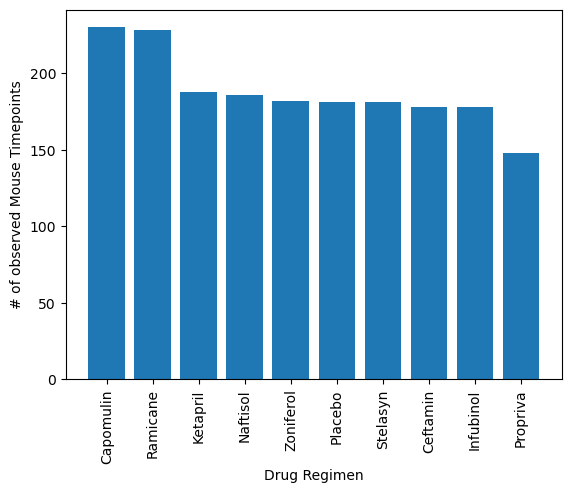

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


x_axis = mouse_drug.index
y_axis = mouse_drug["Timepoint"]
plt.bar(x_axis, y_axis)

plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

plt.show()

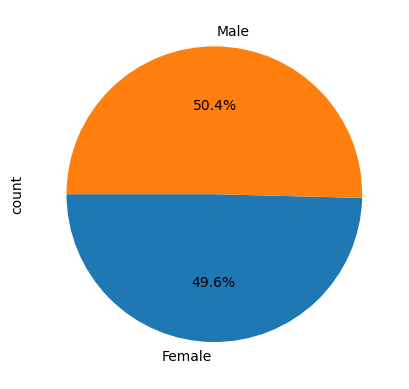

In [73]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

#drop duplicate Mouse Id from the dataframe to get unique Mouse ID
unique_mouseid= filter_df.drop_duplicates(subset=["Mouse ID"])

# Get the unique mice with their gender
#groupby unique "Mouse ID" by gender and count the total IDs in each gender.
unique_mouseid_pie = unique_mouseid.groupby("Sex")["Mouse ID"].count() 

# Make the pie chart
unique_mouseid_pie.plot(kind="pie", autopct="%1.1f%%", startangle = 180)
plt.ylabel("count")

plt.show()


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


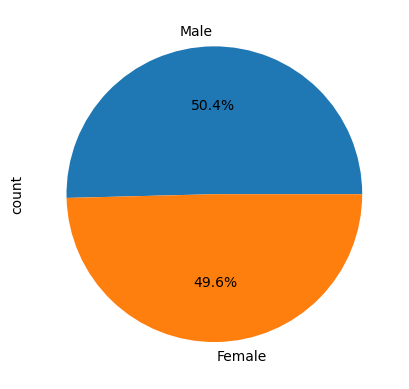

In [28]:
#Create the second pie chart with Matplotlib's pyplot methods.
print(unique_mouseid_pie)

labels = ["Male", "Female"]
sizes = [125, 123]
plt.pie(sizes, labels=labels,  autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:

# # Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
last_timepoint = filter_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_tumor_df=pd.merge(last_timepoint, filter_df, on=["Mouse ID", "Timepoint"])









In [91]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers:

# Loop over each treatment 
for treatment in treatment_list:
    # Locate the rows that contain mice on each drug and get the tumor volumes
    tumor_volume = drug_tumor_df.loc[drug_tumor_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    #Append the tumor tumor_volumes list
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the IQR
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    #Determine the outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    
    #Print out the results 
    print(f"{treatment}'s potential outliers: {outliers}")
   



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


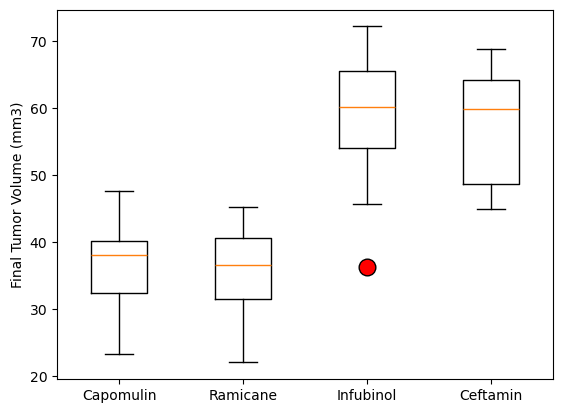

In [92]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

bp = plt.boxplot(tumor_volume_data, tick_labels=treatment_list)

# Use setp to modify the color and size of outlier
plt.setp(bp['fliers'], markerfacecolor='r', markersize=12)

# Add y-axis label
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

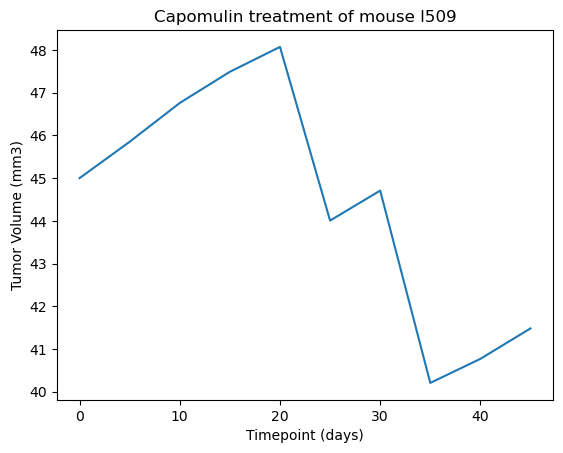

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#create a new dataframe where Mouse ID is l509 and Drug Regimen is Capomulin for plotting 
capomulin_l509 = filter_df.loc[(filter_df["Mouse ID"]=="l509") & (filter_df["Drug Regimen"]=="Capomulin")]

x_axis = capomulin_l509["Timepoint"]
y_axis = capomulin_l509["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis )

plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

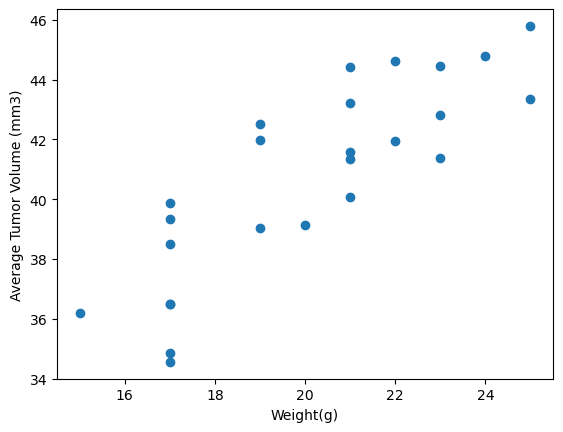

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Dataframe with rows for Capomulin only
capomulin_data = merge_df.loc[(merge_df["Drug Regimen"]=="Capomulin")]

# Groupby mouse id to calculate the mean value for tumor volume and weight of each mouse
mean_data = capomulin_data.groupby("Mouse ID").aggregate({"Tumor Volume (mm3)":'mean',
                                                   "Weight (g)":'mean'})

x_axis = mean_data["Weight (g)"]
y_axis = mean_data ["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


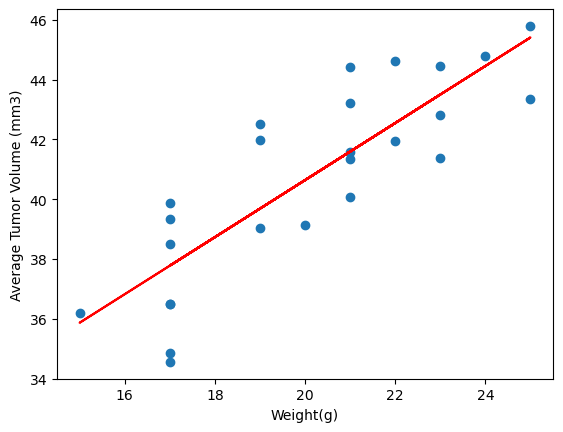

In [72]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# calculate correlation
x_axis = mean_data["Weight (g)"]
y_axis = mean_data ["Tumor Volume (mm3)"]
correlation =st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")


plt.scatter(x_axis, y_axis)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

# calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")
plt.show()

